Learning a CDF using a Dirichlet Process <br>
Author: Mike Stanley <br>
Created: September 14, 2018 <br>

We experiment with using a dirichlet process to learn a cdf. We follow along with Larry Wasserman's non-parametric bayesian estimation notes from the 36-702 class at CMU.

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [20]:
%run /Users/mikestanley/statistics/dp_playground/src/dp_funcs.py

# The situation

We want to estimate the cdf, $F$, given some data. In the bayesian perspective, we want to put a prior on the set of all cdf's, $\mathcal{F}$, and learn the posterior given some data, $X_1, \dots, X_n$. <br>

We use a dirichlet process prior, $DP(\alpha, F_0)$, where $F_0$ is our best guess at the actual cdf, and $\alpha$ controls how tightly concentrated the prior is around $F_0$.
- implement a vanilla standard normal and learn the cdf
- investigate how the choice of $\alpha$ and $F_0$ affect the speed and accuracy of the posterior learning
- investigate how the quanity of the data affect the method

# Generate some data

To keep things simple, we'll suppose our data come from a standard normal, $X_0, \dots, X_n \sim N(0, 1)$.

In [22]:
# data parameters
MU = 0
STD = 1

In [23]:
# generate some data
np.random.seed(42)
data_sm = stats.norm(MU, STD).rvs(size=25)
data_med = stats.norm(MU, STD).rvs(size=200)
data_lg = stats.norm(MU, STD).rvs(size=1000)

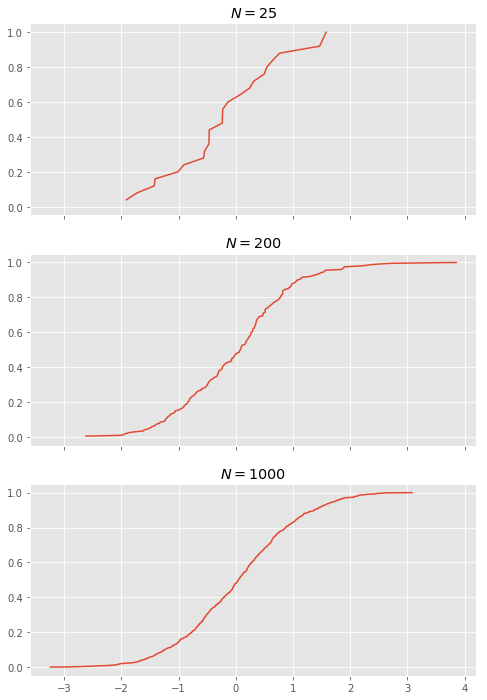

In [25]:
# look at the empirical cdfs for each of the above
fig, ax = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(8, 12))

# small
sm_emp = empirical_cdf(data_sm)
ax[0].plot(sm_emp[:,0], sm_emp[:,1])
ax[0].set_title('$N=25$')

# medium
med_emp = empirical_cdf(data_med)
ax[1].plot(med_emp[:,0], med_emp[:,1])
ax[1].set_title('$N=200$')

# large
lg_emp = empirical_cdf(data_lg)
ax[2].plot(lg_emp[:,0], lg_emp[:,1])
ax[2].set_title('$N=1000$')

plt.show()